**【問題1】練習のために特徴量の選択**  
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df_selected = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
df_selected.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


**【問題2】線形回帰による推定と評価**  
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。  
sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation  
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。  
sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation  
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [3]:
df_selected.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

MSE : 4118334562.671


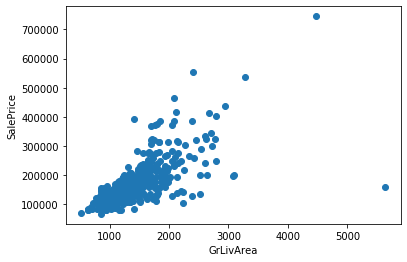

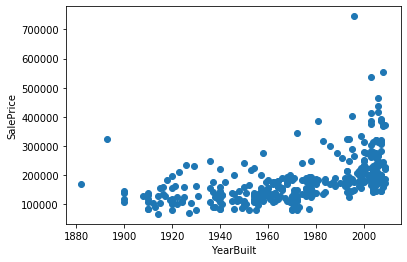

In [5]:
# データ分割
X = df_selected.iloc[:, :2].values
y = df_selected.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 標準化
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

# モデル
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)

# 評価
print('MSE : %.3f' % mean_squared_error(y_true=y_test, y_pred=y_pred_lr))

# 可視化
for x, label_x in zip([X_test[:, 0], X_test[:, 1]], ['GrLivArea', 'YearBuilt']):
    plt.scatter(x, y_test)
    plt.xlabel(label_x)
    plt.ylabel('SalePrice')
    plt.show()

**【問題3】手法の比較**  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。  
その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。  

- 線形回帰
- SVM
- 決定木
- ランダムフォレスト  

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。
- sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
- sklearn.svm.SVR — scikit-learn 0.21.3 documentation
- sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
- sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation  

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear regression
MSE : 2725908099.064


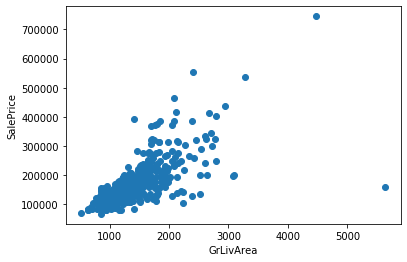

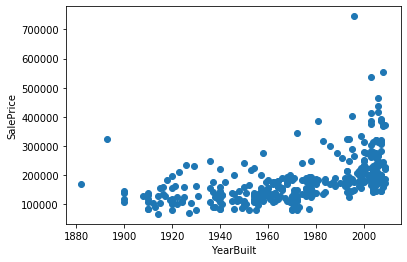

support vector machine
MSE : 6943346839.260


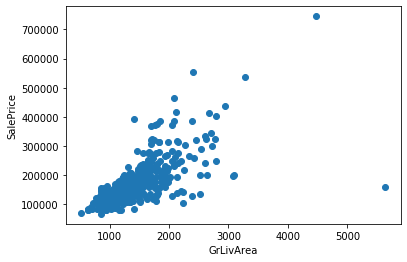

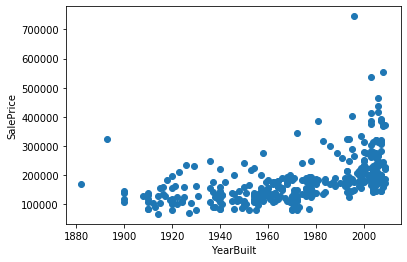

decision tree
MSE : 3288009790.010


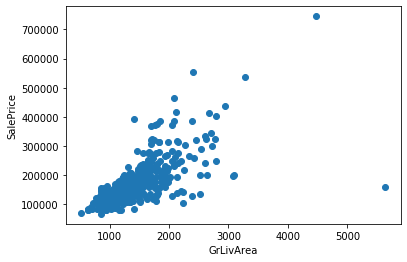

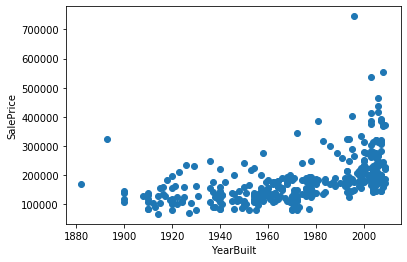

random forest
MSE : 1837514831.801


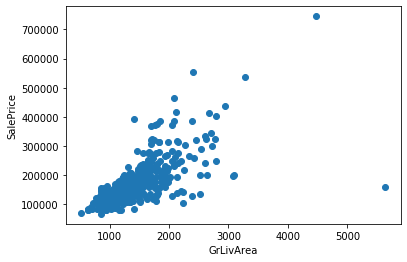

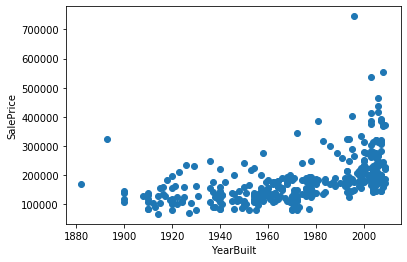

,MSE
linear regression,2.725908e+09
support vector machine,6.943347e+09
decision tree,3.288010e+09
random forest,1.837515e+09


In [7]:
# インスタンス化
lr = LinearRegression()
svm = SVR()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

models = [lr, svm, tree, forest]
labels = ['linear regression', 'support vector machine', 'decision tree', 'random forest']
metric_results = []

for model, label in zip(models, labels):
    # 学習
    model.fit(X_train_std, y_train)
    # 推定
    y_pred = model.predict(X_test_std)
    # 評価
    print(label)
    print('MSE : %.3f' % mean_squared_error(y_true=y_test, y_pred=y_pred))
    metric_results.append(mean_squared_error(y_true=y_test, y_pred=y_pred))
    # 可視化
    for x, label_x in zip([X_test[:, 0], X_test[:, 1]], ['GrLivArea', 'YearBuilt']):
        plt.scatter(x, y_test)
        plt.xlabel(label_x)
        plt.ylabel('SalePrice')
        plt.show()
pd.DataFrame(metric_results, index=labels, columns=['MSE'])

**【問題4】（アドバンス課題）他の特徴量も使用しての学習**  
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。  
どう選択・加工するかにはデータ分析が重要になってきます。  
KaggleのNotebooksも参考にできます。  
House Prices: Advanced Regression Techniques | Kaggle

In [8]:
import numpy as np

missingno = df.isnull().sum()[df.isnull().sum() > 0]
df_nullfeaturedropped = df.drop(missingno.index, axis=1)
# 欠損値が5つ以上ある特徴量を削除
corr_mat = df_nullfeaturedropped.corr(method='pearson')
abs_corr_mat_SalePrice = np.fabs(corr_mat['SalePrice']).drop('SalePrice')
corr_mat_SalePrice_top5_index = abs_corr_mat_SalePrice.nlargest(5).index
X = df.loc[:, corr_mat_SalePrice_top5_index].values
y = df.loc[:, 'SalePrice'].values

In [9]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

# インスタンス化
lr = LinearRegression()
# 学習
lr.fit(X_train_std, y_train)
# 推定
y_pred = lr.predict(X_test)
# 評価
print('MSE : %.3f' % mean_squared_error(y_true=y_test, y_pred=y_pred))

MSE : 4234170166510089.500


単純にSalePriceに対して相関係数が高いtop5の特徴量を標準化して、  
LinearRegressionにて学習を行い推定、評価を行ったが、特徴量を2つ使用した場合と比べてMSEの値が大きくなった。  
結果の精度が悪くなってしまっているため、特徴量選択を工夫する必要がある。